Team 4 Unsupervised learning team members: 
Charles Maponya, 
Chuene Mokgokong,
Kgomotso Moepe,
Lesedi, 
Thabisile Obi 

[Trello board ](https://trello.com/b/dVQJqi5C/team4unsupervised)

## Problem Statement 
problem statement to be added here 

![image.png](https://manofmany.com/wp-content/uploads/2020/04/Veboli-new-2.jpg)

# Start Comet experiment

# Table of contents

### [1. Introduction](#introduction)


### [2. Import libaries and datasets](#libaries)


### [3. Exploratory Data Analysis](#eda)


### [4. Prepocessing](#prep)


### [5. Modelling](#mod)



### [6. Conclusion](#conc)


# [1. Introduction](#introduction)

Recommender systems are systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product that the user is most likely to purchase and are of interest. Companies like Netflix and Amazon use recommender systems to help their users to identify the correct product or movies for them.

Recommender systems are an important class of machine learning algorithms that offer relevant suggestions to users. The suggested items are as relevant to the user as possible so that the user can engage with those items: YouTube videos, news articles, online products, movie and series recommendation.

Items are ranked according to their relevancy, and the most relevant ones are shown to the user. The relevance is determined by the recommender system, mainly based on historical data. For example, If you've recently watched YouTube videos about elephants, then YouTube is going to start showing you many elephant videos with similar titles and themes. 
Recommender systems are generally divided into two main categories: collaborative filtering and content-based systems.

![image.png](https://miro.medium.com/max/690/1*G4h4fOX6bCJhdmbsXDL0PA.png)
 
Both users and service providers have benefited from these kinds of systems. Intelligent algorithms can help viewers find great titles from tens of thousands of options. This notebook will construct a recommendation algorithm based on content and collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historic preferences.

Providing an accurate and robust solution will have immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

# [2. Import libaries and datasets](#libaries)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from wordcloud import WordCloud, STOPWORDS
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
        
import surprise
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
import time
from surprise import SVD
from surprise import accuracy
import re
import plotly.express as px
import scipy as sp
from wordcloud import WordCloud, STOPWORDS
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

### Loading all Necessary Data sets

In [2]:
#import datasets
data_folder = '../unsupervised_data/unsupervised_movie_data/'
#data_folder = 'C:/Users/ADMIN/Desktop/unsupervised_project/'
train_df = pd.read_csv(data_folder + 'train.csv')
test_df = pd.read_csv(data_folder + 'test.csv')
tags_df = pd.read_csv(data_folder + 'tags.csv')
movies_df = pd.read_csv(data_folder + 'movies.csv')
links_df = pd.read_csv(data_folder + 'links.csv')
imdb_df = pd.read_csv(data_folder + 'imdb_data.csv')
genome_tags = pd.read_csv(data_folder + 'genome-tags.csv')
genome_score = pd.read_csv(data_folder + 'genome-scores.csv')

# [3. Exploratory Data Analysis](#eda)

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. EDA is the critical process of performing initial investigations on data to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modelling or hypothesis testing task.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand, before getting them dirty with it, which will be done below.

Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data

In [3]:
## Creating a summary stats function
def Summary(df):
    return df.info()

In [4]:
Summary(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [5]:
Summary(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [6]:
Summary(tags_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [7]:
Summary(movies_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [8]:
Summary(links_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [9]:
Summary(imdb_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [10]:
Summary(genome_tags)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [11]:
Summary(genome_score)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


Most of the DataFrames have a Dtype of int64 and float64, which is an indication for numeric values. However, some DataFrames also have Dtype of an object, which is an indication of non-numeric character. The DataFrames which have a Dtype include tags_df; movies_df; imdb_df; and genome_df. 

##### Getting The shapes of our data sets

In [14]:
print('train data:',train_df.shape) 
print('test data:',test_df.shape)
print('tags data:',tags_df.shape)
print("Movies data:",movies_df.shape)
print('links data:',links_df.shape)
print('imdb data:',imdb_df.shape)
print('genome tags data:',genome_tags.shape)
print('genome scores data:',genome_score.shape)

train data: (10000038, 4)
test data: (5000019, 2)
tags data: (1093360, 4)
Movies data: (62423, 3)
links data: (62423, 3)
imdb data: (27278, 6)
genome tags data: (1128, 2)
genome scores data: (15584448, 3)


### Visualizing the dataframes

In [17]:
# Created a Data Frame outlining the size of our data
dataframes = ['train_df', 'test_df', 'tags_df', 'imdb_df',
              'links_df', 'movies_df', 'genome_tags', 'genome_score']
sizes = [len(train_df), len(test_df), len(tags_df),
         len(imdb_df), len(links_df), len(movies_df),
         len(genome_tags), len(genome_score)]
total_size_df = pd.DataFrame(list(zip(dataframes, sizes)),
                             columns=['dataframe', 'sizes'])
total_size_df

,dataframe,sizes
0,train_df,10000038
1,test_df,5000019
2,tags_df,1093360
3,imdb_df,27278
4,links_df,62423
5,movies_df,62423
6,genome_tags,1128
7,genome_score,15584448


In [18]:
total_size_df = total_size_df[total_size_df['sizes'] > 100000]
total_size_df

,dataframe,sizes
0,train_df,10000038
1,test_df,5000019
2,tags_df,1093360
7,genome_score,15584448


In [19]:
new_row = {'dataframe': 'other', 'sizes': 180530}
total_size_df = total_size_df.append(new_row,
                                     ignore_index=True)
total_size_df

,dataframe,sizes
0,train_df,10000038
1,test_df,5000019
2,tags_df,1093360
3,genome_score,15584448
4,other,180530


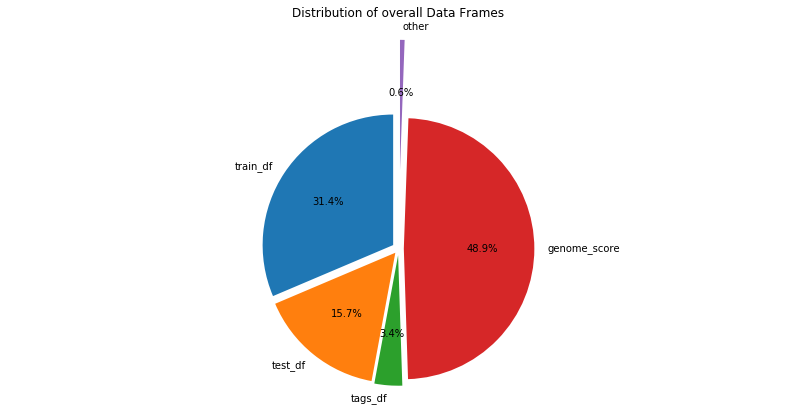

In [29]:
explodeTuple = (0.05, 0.04, 0.05, 0.04, 0.6)
fig1, ax1 = plt.subplots(figsize=(14,7))
ax1.pie(total_size_df['sizes'].values,
        labels=total_size_df['dataframe'].values,
        startangle=90, autopct='%1.1f%%',
        explode=explodeTuple)
ax1.axis('equal')
plt.title('Distribution of overall Data Frames')
plt.show()

In [36]:
len_list = [['train_df', len(train_df)], ['tags_df', len(tags_df)],
            ['imdb_df', len(imdb_df)], ['links_df', len(links_df)],
            ['movies_df', len(movies_df)],
            ['genome_tags', len(genome_tags)],
            ['genome_score', len(genome_score)]]
len_df = pd.DataFrame(len_list,
                      columns=['Dataset', 'Size'])
fig = px.bar(len_df, x=len_df['Dataset'],
             y=len_df['Size'],
             color=len_df['Dataset'],
             title='Distribution of overall Data Frames')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()


The DataFrame's that are visualised in the pie chart are the DataFrames with a size larger than 100000. The DataFrames that had a larger size than 100000 include the train_df; test_df; tags_df; genome_score and other. While the DataFrame's that had a size smaller than 100000 were combined into a DataFrame 'other', these DataFrames are imdb_df; links_df, movies_df; and genome_tags. 

In the pie chart, it is visually seen that the genome_score DataFrame size (48.9%) accounts for almost 50% of the DataFrame sizes. Followed by train_df account for 31.4%. The DataFrame with the least size is the other, with an attribute of only 0.6%.

In the bar graph, the precise unequal distribution of DataFrame sizes is evident. The genome_score DataFrame has the largest size, followed by the train_df. The difference in distribution sizes is clear, where the other DataFrame's bars aren't visually evident because of the large difference between the dimensions.

### Visualizing the null values for each dataframe

In [37]:
# Obtaining the total null values in each Data Frames columns
train_count = pd.DataFrame(train_df.isnull().sum())
test_count = pd.DataFrame(test_df.isnull().sum())
tags_count = pd.DataFrame(tags_df.isnull().sum())
movies_count = pd.DataFrame(movies_df.isnull().sum())
links_count = pd.DataFrame(links_df.isnull().sum())
imdb_count = pd.DataFrame(imdb_df.isnull().sum())
genomet_count = pd.DataFrame(genome_tags.isnull().sum())
genomes_count = pd.DataFrame(genome_score.isnull().sum())

In [38]:
train_count

,0
userId,0
movieId,0
rating,0
timestamp,0


In [39]:
test_count

,0
userId,0
movieId,0


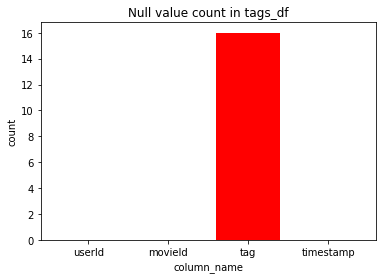

In [42]:
plt.bar(tags_count.index,
        tags_count.values.reshape(len(tags_count), ),
        color='red')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in tags_df')
plt.show()

In [43]:
movies_count

,0
movieId,0
title,0
genres,0


In [44]:
links_count

,0
movieId,0
imdbId,0
tmdbId,107


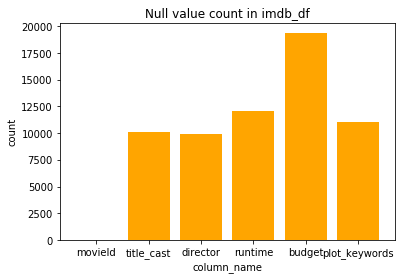

In [45]:
plt.bar(imdb_count.index,
        imdb_count.values.reshape(len(imdb_count), ),
        color='orange')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in imdb_df')
plt.show()

It is essential to check whether your dataset has missing values. The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is critical during the preprocessing of the dataset, as many machine learning algorithms do not support missing values.

The DataFrame's with null values include the tags_df and imdb_df.
In the tags_df, the column with null values is the tag column as seen by the red bar in the Null value count in tags_df bar graph. 
In the imdb_df, there are five columns with null values, with the budget column having the most null values of over 17500. 
There are several methods for dealing with missing values. This includes:

1. Deleting Rows with missing values
2. Impute missing values for continuous variable
3. Impute missing values for categorical variable
4. Other Imputation Methods
5. Using Algorithms that support missing values
6. Prediction of missing values
7. Imputation using Deep Learning Library — Datawig

### Visualizing common users

In [30]:
# To find the number of times a user rated a movie, we create a data frame with the count by userId
train_user = pd.DataFrame(
    train_df['userId'].value_counts()).reset_index()
train_user.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
train_user.head()

,userId,count
0,72315,12952
1,80974,3680
2,137293,3588
3,33844,3208
4,20055,3050


In [31]:
# Grouping the users within a certain range aided us in determining the common userId's and the new ones.
group_one = train_user.loc[(train_user['count'] > 0) & 
            (train_user['count'] < 50),
            'userId'].value_counts().sum()
group_two = train_user.loc[(train_user['count'] >= 50) & 
            (train_user['count'] < 500),
            'userId'].value_counts().sum()
group_three = train_user.loc[(train_user['count'] >= 500) & 
            (train_user['count'] < 1000),
            'userId'].value_counts().sum()
group_four = train_user.loc[(train_user['count'] >= 1000) & 
            (train_user['count'] < 1500),
            'userId'].value_counts().sum()
group_five = train_user.loc[(train_user['count'] >= 1500),
            'userId'].value_counts().sum()

In [34]:
# To give us insight in the spread, we used figures to determine the spread.
trial_error = np.array([['group_one', group_one,
                         'between 1 and 50'],
                        ['group_two', group_two,
                         'between 50 and 500'],
                        ['group_three', group_three,
                         'between 500 and 1000'],
                        ['group_four', group_four,
                         'between 1000 and 1500'],
                        ['group_five', group_five,
                         'greater than 1500']])
trial_error_df = pd.DataFrame({'group': trial_error[:, 0],
                               'userId_grouping': trial_error[:, 1],
                               'explanation': trial_error[:, 2]})
fig = px.bar(trial_error_df,
             x=trial_error_df["group"],
             y=trial_error_df["userId_grouping"],
             color=trial_error_df["group"],
             title='Grouped Rating Distribustion')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()
trial_error_df


,group,userId_grouping,explanation
0,group_one,110010,between 1 and 50
1,group_two,50973,between 50 and 500
2,group_three,1338,between 500 and 1000
3,group_four,159,between 1000 and 1500
4,group_five,61,greater than 1500


The user Id's are grouped by the rating counts in a grouping range illustrated in the DataFrame above.  In the Grouped Rating Distribution bar graph, it is visually displayed that there is unequal distribution.  The distribution is skewed to the left, with the majority of the user ids in the rating count range between 1 and 50. At the same time, the last group has only a value count of 61, which is a significant difference from group one with a value count of 110 010.

In [46]:
def user_ratings_count(df, n):
    plt.figure(figsize=(14,7))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    plt.show()

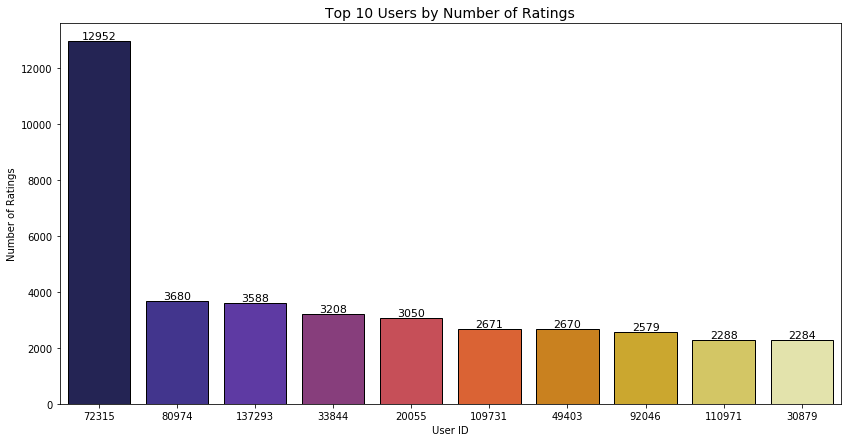

In [47]:
user_ratings_count(train_df,10)

<b color='darkslateblue'>Filtering out user 72315 because his/her number of raings is too extreme and he/she is an oulier</b>

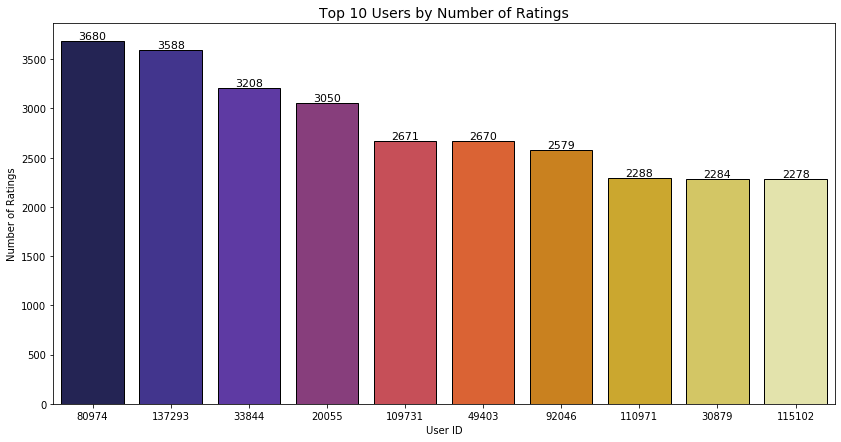

In [48]:
user_ratings_count(train_df[train_df['userId'] !=72315],10)

### Exploring Movie Genres

In [49]:
genres = pd.DataFrame(movies_df['genres'].
                      str.split("|").
                      tolist(),
                      index=movies_df['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']
genres.head()

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


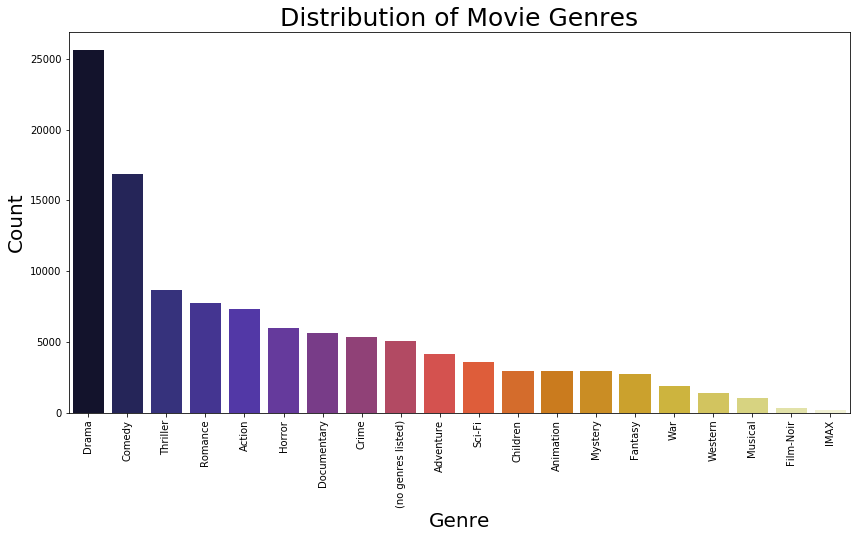

In [50]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre',
              data=genres,
              palette='CMRmap',
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

The top 3 most popular movie genres include drama, comedy and thriller. 
A Genre consists of four elements or parts: character, story, plot and setting. And often people will state that a particular movie had a good plot or an intriguing story. What people are referring to is that they enjoyed the characters, the problems/conflict the characters got into, and how the characters got out of the problems and conflict. The drama genre could be the most popular because it caters the character development in the plot, often overcoming dome form of challenge and conflicts, i.e. human struggles.  According to Hayley Mckenzie, drama delivers the emotional and relational development of realistic characters in a realistic setting. It offers intense character development and tells an honest story of human struggle. And this could be the possible reason why drama is a popular genre. 

### Exploring the Movies data

In [51]:
movies=pd.merge(train_df, movies_df,on='movieId',how='inner')
movies.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [55]:
full_movies = pd.merge(movies,imdb_df,on='movieId',how='inner')
full_movies.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [52]:
def top_n_plot_by_ratings(df,column, n):
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel(column.title())
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=90)
    plt.show()

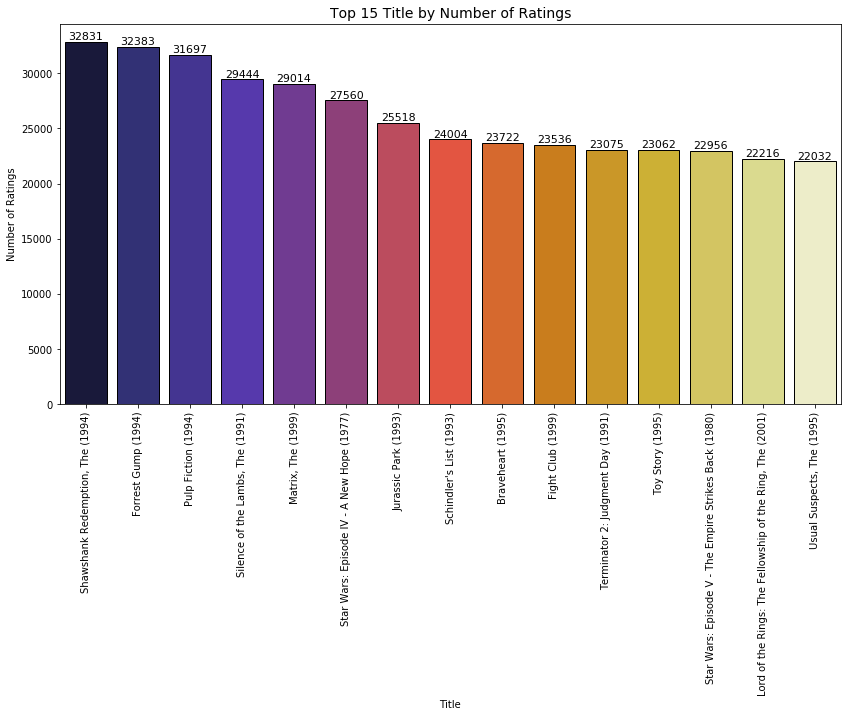

In [53]:
top_n_plot_by_ratings(movies,'title',15)

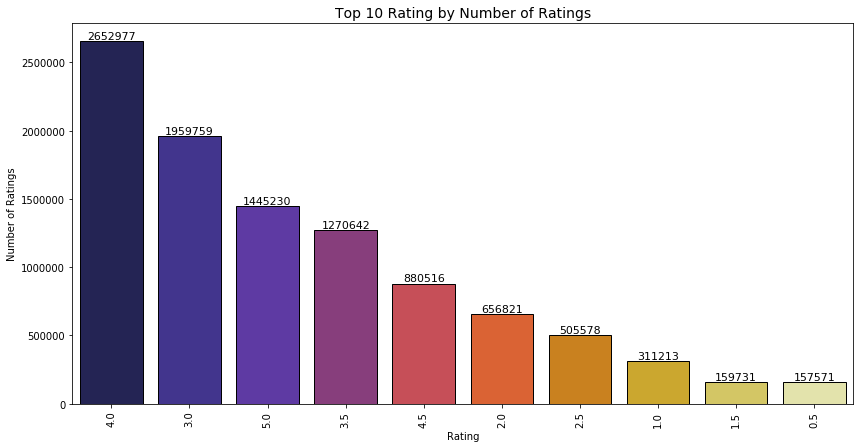

In [54]:
top_n_plot_by_ratings(movies,'rating',10)

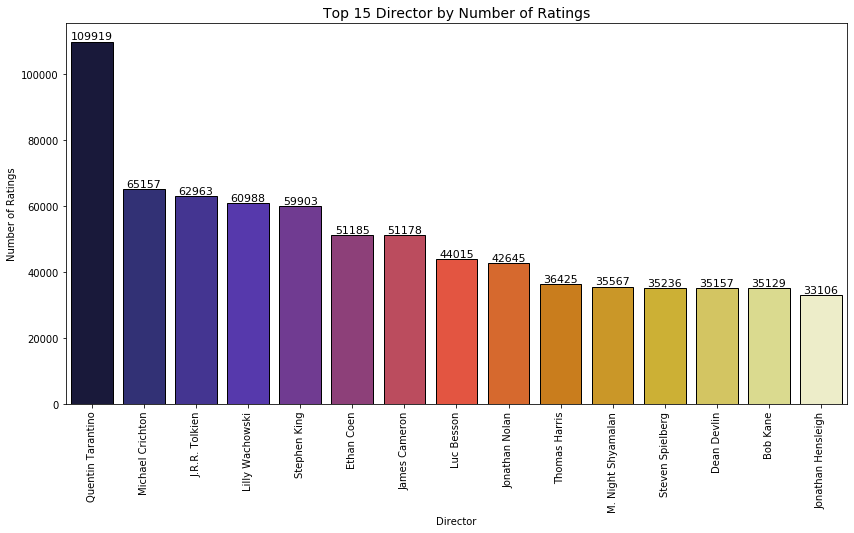

In [56]:
top_n_plot_by_ratings(full_movies,'director',15)

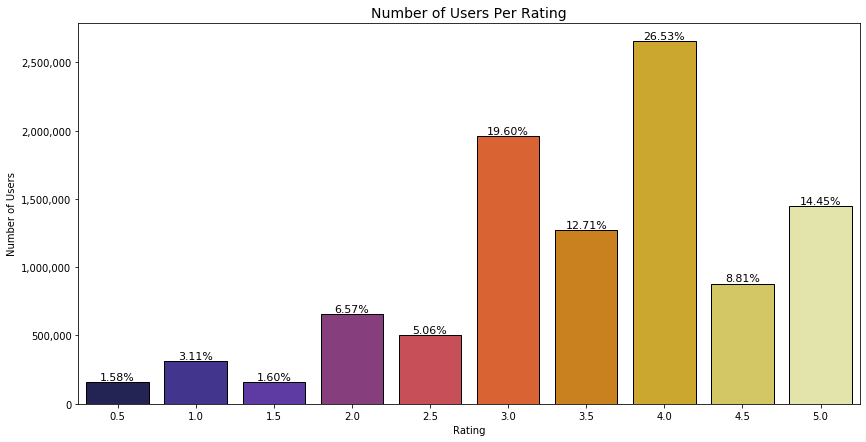

In [57]:
movieRatingDistGroup = train_df['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=movieRatingDistGroup, x='index', y='rating', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("Rating")
ax.set_ylabel('Number of Users')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(movieRatingDistGroup['rating'].sum())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+350, '{0:.2%}'.format(height/total), fontsize=11, ha="center", va='bottom')
plt.title('Number of Users Per Rating', fontsize=14)
plt.show()

In [58]:
def count_directors(df, count = 10):
    """
    Function to count the most common dircetors in a DataFrame:
    Parameters
    ----------
        df (DataFrame): input dataframe containing imdb metadata
        count (int): filter directors with fewer than count films
        
    Returns
    -------
        directors (DataFrame): output DataFrame
    Examples
    --------
        >>> df = pd.DataFrame({'imdbid':[0,1,2,3,4,5], 'director': [A,B,A,C,B]})
        >>> count_directors(df, count = 1)
            |index|director|count|
            |0|A|2|
            |1|B|2|
            |2|C|1|
    """
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)

In [61]:
def feature_count(df, column):
    plt.figure(figsize=(14,7))
    ax = sns.barplot(x = df[f'{column}'], y= df['count'], palette='brg')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

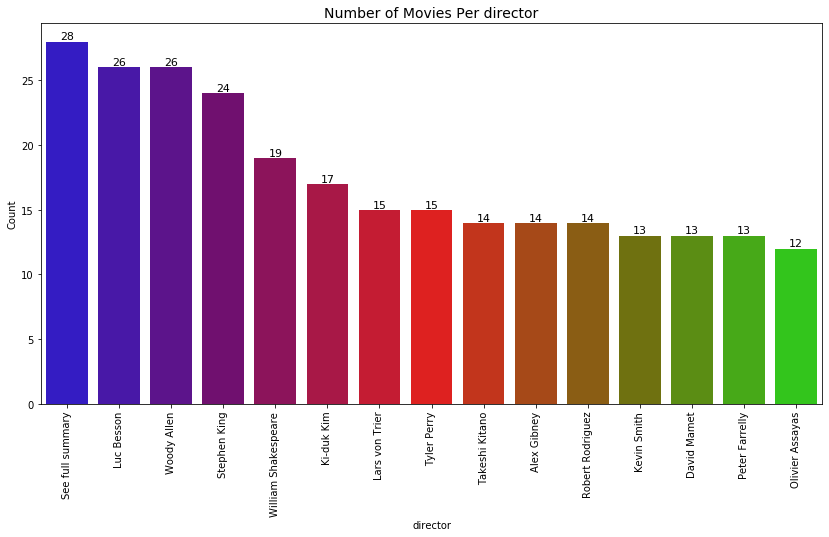

In [62]:
directors = count_directors(imdb_df)
feature_count(directors.head(15), 'director')

### Word Clouds

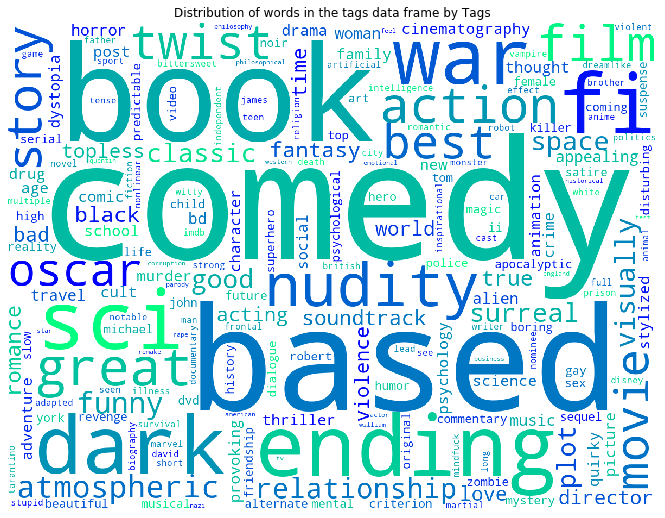

In [72]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tags_df['tag']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=1200, height=900,
                      colormap='winter',
                      background_color='white',
                      stopwords=stopwords,collocations=False,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(14, 7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Distribution of words in the tags data frame by Tags')
plt.tight_layout(pad=0)

plt.show()


In [73]:
value_count = pd.DataFrame(tags_df['tag'].
                           value_counts()).reset_index()
value_count.rename(columns = {'index': 'genre', 'tag': 'count'},
                   inplace = True)

In [74]:
value_count.head()

,genre,count
0,sci-fi,8330
1,atmospheric,6516
2,action,5907
3,comedy,5702
4,surreal,5326


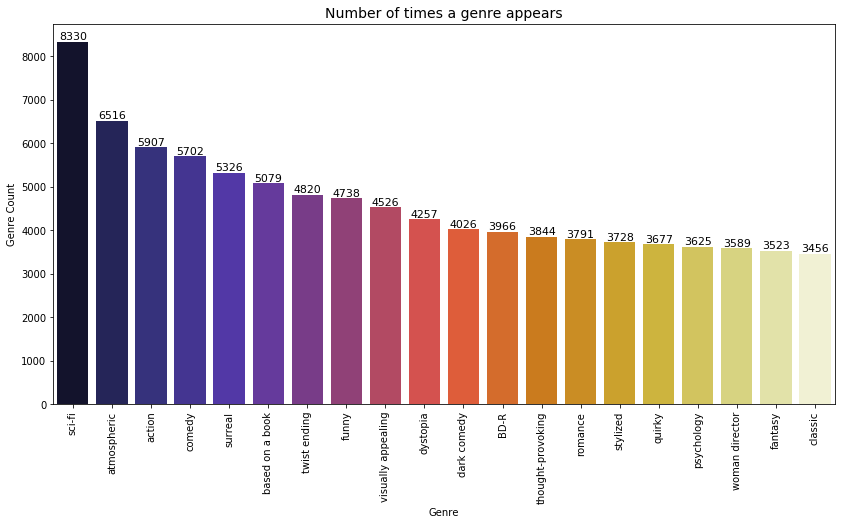

In [80]:
genre_count = value_count.head(20)
plt.figure(figsize=(14,7))
ax = sns.barplot(x = genre_count['genre'], y= genre_count['count'], palette='CMRmap')
for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.title('Number of times a genre appears', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Genre Count')
plt.xticks(rotation=90)
plt.show()

### Publishing Years

In [81]:
dates = []
for title in movies_df['title']:
    if title[-1] == " ":
        year = title[-6: -2]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)
    else:
        year = title[-5: -1]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)

movies_df['Publish Year'] = dates


In [82]:
dates = []
for title in movies_df['title']:
    if title[-1] == " ":
        year = title[-6: -2]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)
    else:
        year = title[-5: -1]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)

movies_df['Publish Year'] = dates



In [83]:
len(movies_df)

62423

In [85]:
len(movies_df[movies_df['Publish Year'] == 9999])

408

In [86]:
movies_df[(movies_df['Publish Year'] > 1888) &
          (movies_df['Publish Year'] < 2021)]

,movieId,title,genres,Publish Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001


In [87]:
dataset = pd.DataFrame(movies_df['Publish Year'].
                       value_counts()).reset_index()
dataset.rename(columns={'index': 'year', 'Publish Year': 'count'},
               inplace=True)
dataset.head()

,year,count
0,2015,2513
1,2016,2488
2,2014,2406
3,2017,2374
4,2013,2173


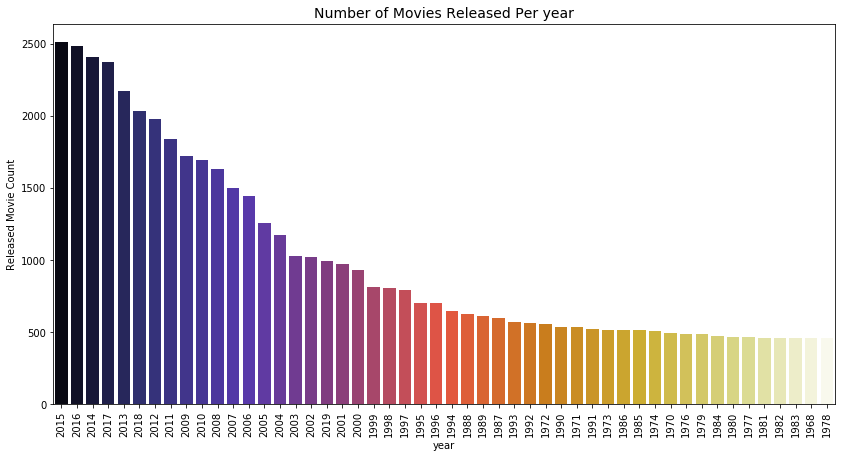

In [92]:
year_dataset = dataset[(dataset['year']>1888) & (dataset['year']<2021)].sort_values(by='count',ascending=False).head(50)
plt.figure(figsize=(14,7))
ax = sns.barplot(x = year_dataset['year'], y= year_dataset['count'], order=year_dataset['year'], palette='CMRmap')
#for p in ax.patches:
#       ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.title('Number of Movies Released Per year', fontsize=14)
plt.xlabel('year')
plt.ylabel('Released Movie Count')
plt.xticks(rotation=90)
plt.show()

### [3. Preprocessing](#prep)

In [34]:
# Below is the dataframe we will be altering.
working_train = train_df.drop(columns='timestamp')

In [35]:
df_work = working_train.set_index('movieId').join([movies_df[['movieId',
                                                           'genres']]
                                                   .set_index('movieId'),
                                                   imdb_df[['movieId',
                                                         'title_cast',
                                                         'director',
                                                         'plot_keywords']].
                                                   set_index('movieId')],
                                                  how='left').reset_index()
df_work.head()


,movieId,userId,rating,genres,title_cast,director,plot_keywords
0,1,158849,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,1,97203,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
2,1,161871,3.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
3,1,45117,4.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
4,1,27431,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation


In [36]:
def preprocessor_train(df):
    working_train = df.copy()

    # Merge
    df_work = working_train.set_index('movieId').join([movies_df
                                                       [['movieId', 'genres']].
                                                       set_index('movieId'),
                                                       imdb_df[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# '(no genre listed)' is an equivalent of a missing value in the column genres

    df_work['genres'] = ['' if x == '(no genres listed)' else x for x in df_work['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_work.fillna('', inplace=True)

    for col in df_work.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_work[col] = [''.join(x.split()) for x in df_work[col]]

        # substituting '|' with a white space
        df_work[col] = [' '.join(x.split('|')) for x in df_work[col]]

    # joining the features of interest
    df_work['corpus'] =  df_work[df_work.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_work[['movieId', 'userId', 'corpus', 'rating']]


In [37]:
def preprocessor_test(df):
    working_train = df.copy()

    # Merge
    df_work = working_train.set_index('movieId').join([movies_df
                                                       [['movieId', 'genres']].
                                                       set_index('movieId'),
                                                       imdb_df[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# '(no genre listed)' is an equivalent of a missing value in the column genres

    df_work['genres'] = ['' if x == '(no genres listed)' else x for x in df_work['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_work.fillna('', inplace=True)

    for col in df_work.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_work[col] = [''.join(x.split()) for x in df_work[col]]

        # substituting '|' with a white space
        df_work[col] = [' '.join(x.split('|')) for x in df_work[col]]

    # joining the features of interest
    df_work['corpus'] =  df_work[df_work.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_work[['movieId', 'userId', 'corpus']]

In [38]:
Test = preprocessor_test(test_df)

In [39]:
X = preprocessor_train(train_df.drop(columns=['timestamp'])) # DO NOT RUN THIS ON LOCAL COMPUTER


In [40]:
X1 = X.drop(columns=['rating', 'userId', 'movieId'])
T1 = Test.drop(columns=['userId', 'movieId'])


In [41]:
y = X['rating']

In [42]:
cv = CountVectorizer()
X_mat =cv.fit_transform(X1['corpus'])

In [43]:
Test_mat = cv.transform(T1['corpus'])

In [44]:
X_mat.shape

(10000038, 130227)

## Modelling

### Content-Based Filtering Recommendation

#### Linear Regression Model

In [45]:
estimators2 = []
estimators2.append(('standardize',
                    StandardScaler(with_mean=False)))
estimators2.append(('mod',
                    LinearRegression()))
model = Pipeline(estimators2)
model.fit(X_mat, y)

Pipeline(steps=[('standardize', StandardScaler(with_mean=False)),
                ('mod', LinearRegression())])

In [47]:
ratings = []
for i in preds:
    prediction = i[3]
    ratings.append(prediction)

### Collaborative-Based Filtering Reccomendation

In [93]:
# Load the 1M dataset
train_df.drop('timestamp', axis=1)
train_subset = train_df[:1000000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

#### Non-Negative Matrix Factorization Algorithm

Non-negative matrix factorization, also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements.

In [94]:
nmf_model = NMF(n_epochs=50, n_factors=200, random_state=42)
nmf_model.fit(trainset)
nmf_predictions =nmf_model.test(testset)
nmf_rmse = accuracy.rmse(nmf_predictions)

RMSE: 1.1035


#### SlopeOne Algorithm

Slope One is a family of algorithms used for collaborative filtering, introduced in a 2005 paper by Daniel Lemire and Anna Maclachlan. Arguably, it is the simplest form of non-trivial item-based collaborative filtering based on ratings. Their simplicity makes it especially easy to implement them efficiently while their accuracy is often on par with more complicated and computationally expensive algorithms

In [95]:
slo_model = SlopeOne()
slo_model.fit(trainset)
slo_predictions = slo_model.test(testset)
slo_rmse=accuracy.rmse(slo_predictions)

RMSE: 1.0493


#### CoClustering Algorithm

Biclustering, block clustering , co-clustering, or two-mode clustering is a data mining technique which allows simultaneous clustering of the rows and columns of a matrix. The term was first introduced by Boris Mirkin to name a technique introduced many years earlier, in 1972, by J. A. Hartigan.

In [96]:
cc_model = CoClustering(n_epochs=50,random_state=42)
cc_model.fit(trainset)
cc_predictions = cc_model.test(testset)
cc_rmse=accuracy.rmse(cc_predictions)

RMSE: 1.0162


#### Singular Value Decomposition (SVD)

The singular value decomposition (SVD) provides another way to factorize a matrix, into singular vectors and singular values. The SVD allows us to discover some of the same kind of information as the eigendecomposition.The SVD is used widely both in the calculation of other matrix operations, such as matrix inverse, but also as a data reduction method in machine learning. SVD can also be used in least squares linear regression, image compression, and denoising data.

In [97]:
svd_model = SVD(n_epochs=50,n_factors=400,init_std_dev=0.001,random_state=42)
svd_model.fit(trainset)
svd_predictions = svd_model.test(testset)
svd_rmse = accuracy.rmse(svd_predictions)

RMSE: 0.9018


#### Singular Value Decomposition plus-plus (SVDpp)

The SVD++ algorithm, an extension of SVD taking into account implicit ratings.

In [ ]:
svdpp_model = SVDpp(n_epochs=50,n_factors=400,init_std_dev=0.001,random_state=42)
svdpp_model.fit(trainset)
svdpp_predictions = svdpp_model.test(testset)
svdpp_rmse = accuracy.rmse(svdpp_predictions)

#### BaselineOnly algorithm

Algorithm predicting the baseline estimate for given user and item.

In [98]:
bsl_options = {'method': 'sgd','n_epochs': 50}
blo_model = BaselineOnly(bsl_options=bsl_options,verbose=True)
blo_model.fit(trainset)
blo_predictions = blo_model.test(testset)
# Calculate RMSE
blo_rmse = accuracy.rmse(blo_predictions)

Estimating biases using sgd...
RMSE: 0.9021


In [51]:
rmse_scores =[nmf_rmse,slo_rmse,cc_rmse,svd_rmse,svdpp_rmse,blo_rmse]
models =['NMF','SlopeOne','CoClustering','SVD','SVD++','BaselineOnly']

accuracy_data = pd.DataFrame({'model':models,'RMSE':rmse_scores})

In [53]:
accuracy_data.sort_values(by='RMSE')

,model,RMSE
4,SVD++,0.898930
3,SVD,0.901287
5,BaselineOnly,0.902062
2,CoClustering,1.016168
1,SlopeOne,1.049265
0,NMF,1.103542


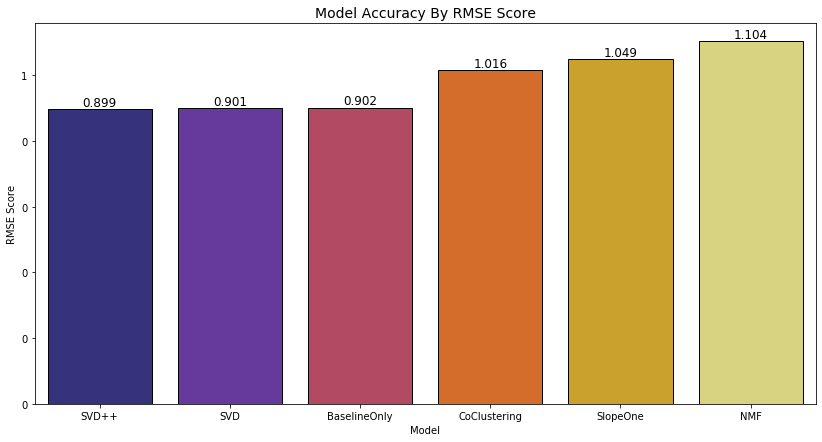

In [62]:
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=accuracy_data.sort_values(by='RMSE'), x='model', y='RMSE', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("Model")
ax.set_ylabel('RMSE Score')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
plt.title('Model Accuracy By RMSE Score', fontsize=14)
plt.show()